In [1]:
from nilearn import surface
from scipy import stats

import matplotlib.pyplot as plt
import nilearn
import numpy as np
import os
import pandas as pd
import pingouin as pg
import seaborn as sns

# Preprocessing

Please contact the corresponding author, Sungshin Kim (sungshinkim@hanyang.ac.kr), or the first author, Junghyun Kim (juhng62@gmail.com) to get raw data.

In [2]:
index_dir = '../index'

subj_list = np.genfromtxt(os.path.join(index_dir, 'GLsubjlist'), dtype='str')

label_dir = '../label/Yeo2011_7Networks_N1000'
label_DAN = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.7Networks_3.label'))
label_VAN = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.7Networks_4.label'))
label_FP = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.7Networks_6.label'))
label_DMN = nilearn.surface.load_surf_data(os.path.join(label_dir, 'lh.7Networks_7.label'))
label_list = [label_DAN, label_VAN, label_FP, label_DMN]
ROI_list = ['DAN', 'VAN', 'FPN', 'DMN']
cond_list = ['CF', 'BF']

In [3]:
# df_Yeo = pd.DataFrame()

# subj_col = [subj for subj in subj_list for _ in range(0, 8)] # 4 labels * 2 conditions
# df_Yeo['subj'] = subj_col

# label_col = [label for label in ROI_list for _ in range(2)] * len(subj_list)
# df_Yeo['label'] = label_col

# cond_col = cond_list * len(label_list) * len(subj_list)
# df_Yeo['cond'] = cond_col

# # df_Yeo

In [4]:
# beta_col = []

# for subj in subj_list:
#     beta_dir = beta_dir = f'/Users/clmn/Desktop/GL_FS/GLFS02/{subj}/main/GLanalysis02.lh'
    
#     for label in label_list:
        
#         for cond in cond_list:
#             if cond == 'CF':
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 0]
#             else :
#                 beta = nilearn.surface.load_surf_data(os.path.join(beta_dir, 'beta.nii.gz'))[:, 1]
            
#             beta_sum = 0
            
#             for i_label in label:
#                 beta_sum += beta[i_label]
            
#             beta_col.append(beta_sum/len(label))

# # print(len(beta_col))

# df_Yeo['beta'] = beta_col

# df_Yeo

In [5]:
# df_Yeo.to_csv('../data/beta_Yeo_network.csv', index=False)

In [6]:
df_Yeo = pd.read_csv('../data/beta_Yeo_network.csv')
df_Yeo

,subj,label,cond,beta
0,GL03,DAN,CF,1.438713
1,GL03,DAN,BF,0.928882
2,GL03,VAN,CF,0.931456
3,GL03,VAN,BF,0.613224
4,GL03,FPN,CF,0.680407
...,...,...,...,...
187,GL29,VAN,BF,0.369337
188,GL29,FPN,CF,0.251929
189,GL29,FPN,BF,0.063697
190,GL29,DMN,CF,-0.027477


# Graph

In [7]:
def annot_stat_hor(star, x1, x2, y, h, col='k', ax=None):
    ax = plt.gca() if ax is None else ax
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax.text((x1+x2)*.5, y+h, star, ha='center', va='bottom', color=col)

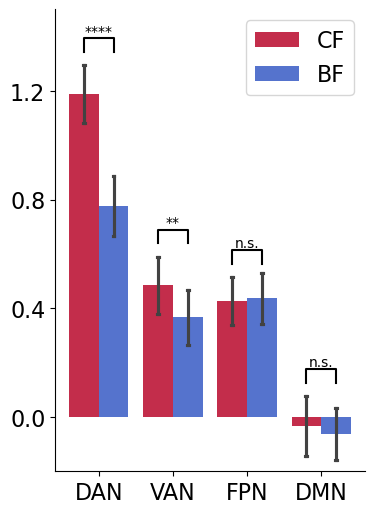

In [8]:
plt.figure(figsize=(4,6))

ax = sns.barplot(data=df_Yeo, x='label', y='beta', hue='cond', errorbar=("se", 1), capsize=0.05, 
            palette=['crimson', 'royalblue'])

legend = ax.legend(fontsize=16, loc='upper right')  # This moves the legend to the top left
for text, new in zip(legend.texts, ['CF', 'BF']):  # Update legend text as before
    text.set_text(new)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(np.arange(0, 1.5, 0.4))

ax.set_ylim(-0.2, 1.5)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

annot_stat_hor(star="****", x1=-0.2, x2=0.2, y=ax.lines[0].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="**", x1=0.8, x2=1.2, y=ax.lines[1].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="n.s.", x1=1.8, x2=2.2, y=ax.lines[2].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="n.s.", x1=2.8, x2=3.2, y=ax.lines[3].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)

# fname = '../figures/fig5A.png'
# plt.savefig(fname, dpi=600)
# plt.close()

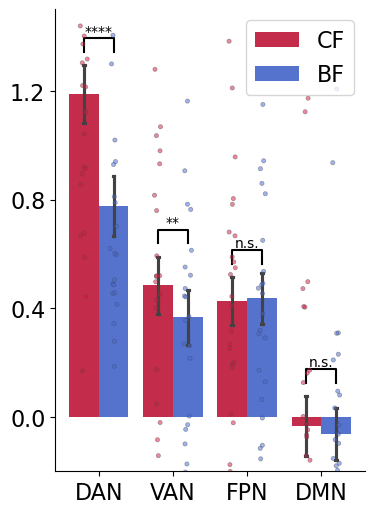

In [9]:
plt.figure(figsize=(4,6))

ax = sns.barplot(data=df_Yeo, x='label', y='beta', hue='cond', errorbar=("se", 1), capsize=0.05, 
            palette=['crimson', 'royalblue'])

sns.stripplot(
    data=df_Yeo, x='label', y='beta', hue='cond', 
    dodge=True, palette=['crimson', 'royalblue'],
    size=3, 
    jitter=True, 
    alpha=0.5, 
    marker='o', 
    edgecolor='auto', 
    linewidth=0.5, 
    ax=ax, legend=False
)

legend = ax.legend(fontsize=16, loc='upper right')  # This moves the legend to the top left
for text, new in zip(legend.texts, ['CF', 'BF']):  # Update legend text as before
    text.set_text(new)

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(np.arange(0, 1.5, 0.4))

ax.set_ylim(-0.2, 1.5)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

annot_stat_hor(star="****", x1=-0.2, x2=0.2, y=ax.lines[0].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="**", x1=0.8, x2=1.2, y=ax.lines[1].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="n.s.", x1=1.8, x2=2.2, y=ax.lines[2].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)
annot_stat_hor(star="n.s.", x1=2.8, x2=3.2, y=ax.lines[3].get_ydata()[4]+0.05, h=0.05, col='k', ax=None)

# fname = '../figures/fig5A.png'
# plt.savefig(fname, dpi=600)
# plt.close()

# Statistics

## T-test

In [10]:
ROI_list = ['DAN', 'VAN', 'FPN', 'DMN']

for ROI in ROI_list:
    a = df_Yeo[(df_Yeo["cond"] == 'CF') & (df_Yeo["label"] == ROI)].groupby('subj')['beta'].mean()
    b = df_Yeo[(df_Yeo["cond"] == 'BF') & (df_Yeo["label"] == ROI)].groupby('subj')['beta'].mean()
    print(ROI, ":", stats.ttest_rel(a,b), stats.ttest_rel(a,b)[1]*4)

DAN : TtestResult(statistic=9.300804083581623, pvalue=2.947294088636561e-09, df=23) 1.1789176354546244e-08
VAN : TtestResult(statistic=3.6860792855984816, pvalue=0.0012224486278133218, df=23) 0.004889794511253287
FPN : TtestResult(statistic=-0.36194727535059673, pvalue=0.7206956670669425, df=23) 2.88278266826777
DMN : TtestResult(statistic=1.1246022990370423, pvalue=0.2723577473207095, df=23) 1.089430989282838
